In [1]:
import ipyvolume as ipv
import tyssue
import json
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import random
import sys
import tyssue.io.hdf5 as hdf5
from IPython.display import Image
from scipy import optimize
from tyssue.draw import sheet_view
from tyssue.geometry.planar_geometry import PlanarGeometry as geom

##### Own functions
import src.vertexModel as vertexModel
import src.inputMechanicalParameters as inputMechanicalParameters
import src.auxFunctions as auxFunctions
from tyssue.topology import add_vert
import src.cellDivision as cellDivision


from tyssue.topology.base_topology import add_vert, close_face, collapse_edge, remove_face
from tyssue.topology.base_topology import split_vert as base_split_vert

from tyssue.draw.plt_draw import create_gif
from tyssue.draw import highlight_faces, create_gif
from IPython.display import Image

import warnings
warnings.filterwarnings("ignore")

collision solver could not be imported You may need to install CGAL and re-install tyssue


In [8]:
# Initialize cellmap, geometry, and energy contributions model
cellmap, geom, energyContributions_model = vertexModel.initialize(40)
cellmap = inputMechanicalParameters.update(cellmap)
energyContributions_model.compute_energy(cellmap)

energyContributions_model.compute_energy(cellmap)
[cellmap, geom, energyContributions_model, history_new, solver1] = vertexModel.solveEuler(cellmap, geom, energyContributions_model, 1000)


#boundary_edges, boundary_faces, inside_edges, inside_faces, inside_vertices, outside_vertices = auxFunctions.identify_boundary_layers(cellmap, 1)

#Change outside vertices mechanics
#high_viscosity_value = 20000  # A very large viscosity value
#for vertex_id in outside_vertices:
#    if vertex_id in cellmap.vert_df.index:
#        cellmap.vert_df.at[vertex_id, "viscosity"] = high_viscosity_value

# Update the vertex specifications with the new viscosity values
#cellmap.update_specs({
#    "vert": {
#        "viscosity": cellmap.vert_df["viscosity"].values  # Apply updated viscosity
#    }
#}, reset=True)


Topology changed!


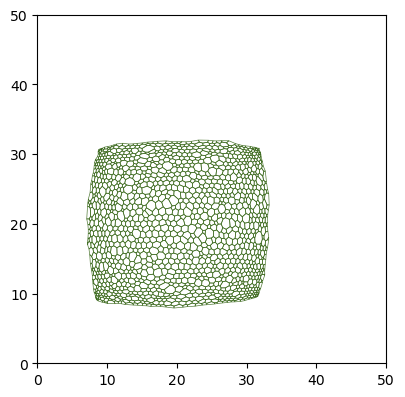

In [9]:
fig, ax = sheet_view(cellmap)
ax.set_xlim([-0, 50])  # Set the limits of the x-axis.
ax.set_ylim([-0, 50])
fig.set_size_inches((5, 5))

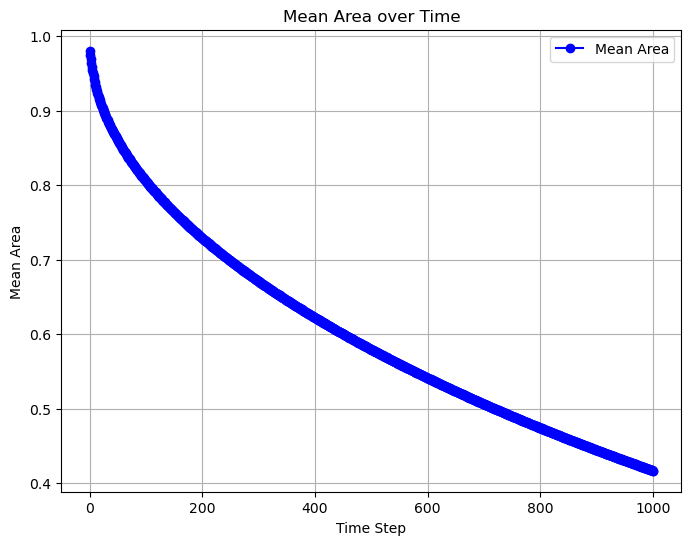

In [10]:
mean_areas = []

for t, cellmap in solver1.history:      
    mean_area = cellmap.face_df['area'].mean()
    mean_areas.append(mean_area)

# Plot mean area over time (t)
plt.figure(figsize=(8, 6))
plt.plot(range(len(mean_areas)), mean_areas, marker='o', linestyle='-', color='blue', label='Mean Area')
plt.title('Mean Area over Time')
plt.xlabel('Time Step')
plt.ylabel('Mean Area')
plt.grid(True)
plt.legend()
plt.show()

In [4]:
cellmap.edge_df

,trgt,nz,length,face,srce,dx,dy,sx,sy,tx,...,uy,rx,ry,sub_area,is_active,length_elasticity,prefered_length,uz,length_elasticity_ECM,length_elasticity_FRC
edge,,,,,,,,,,,,,,,,,,,,,
0,10,0.184105,0.748088,172,6,-0.046529,-0.746640,2.586205,12.192485,2.539676,...,-0.998064,-0.216412,0.484068,0.092052,1,174.111035,0.01,0.57735,147.960229,26.150806
1,7,0.299770,0.393158,190,6,0.366989,-0.141040,2.586205,12.192485,2.953194,...,-0.358735,-0.316115,-0.695347,0.149885,1,289.060139,0.01,0.57735,252.045373,37.014765
2,6,0.147125,0.393158,172,7,-0.366989,0.141040,2.953194,12.051445,2.586205,...,0.358735,0.150578,0.343029,0.073563,1,231.210041,0.01,0.57735,198.832845,32.377196
3,8,0.322594,0.538349,173,7,0.154769,-0.515622,2.953194,12.051445,3.107963,...,-0.957784,-0.655470,0.099380,0.161297,1,241.612674,0.01,0.57735,214.436447,27.176227
4,7,0.130731,0.538349,172,8,-0.154769,0.515622,3.107963,11.535823,2.953194,...,0.957784,0.305347,-0.172593,0.065366,1,263.682775,0.01,0.57735,230.002849,33.679926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,73,0.153196,0.576449,86,406,-0.166435,-0.551899,2.262173,6.978099,2.095738,...,-0.957412,-0.179390,0.325596,0.076598,1,340.236538,0.01,0.57735,312.636774,27.599764
1668,43,0.133913,0.596517,222,446,-0.122829,0.583734,18.270229,14.122846,18.147400,...,0.978571,0.280661,-0.243583,0.066956,1,268.225116,0.01,0.57735,236.963523,31.261593
1669,84,0.106551,0.536757,223,87,-0.001083,-0.536756,2.346904,15.321659,2.345821,...,-0.999998,-0.198005,0.249802,0.053275,1,337.455811,0.01,0.57735,305.372108,32.083702


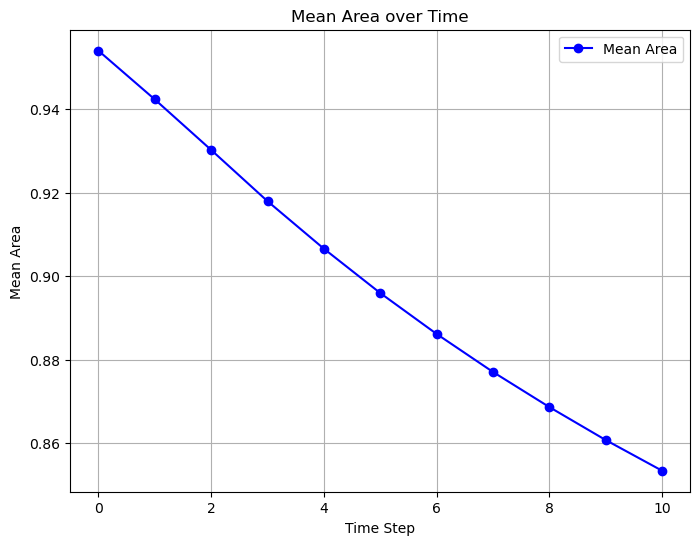

In [5]:
mean_areas = []

for t, cellmap in solver1.history:      
    mean_area = cellmap.face_df['area'].mean()
    mean_areas.append(mean_area)

# Plot mean area over time (t)
plt.figure(figsize=(8, 6))
plt.plot(range(len(mean_areas)), mean_areas, marker='o', linestyle='-', color='blue', label='Mean Area')
plt.title('Mean Area over Time')
plt.xlabel('Time Step')
plt.ylabel('Mean Area')
plt.grid(True)
plt.legend()
plt.show()

In [6]:
cellmap.edge_df

,prefered_length,trgt,sx,ry,uy,length_elasticity_ECM,dy,sub_area,face,tx,...,fy,srce,rx,length_elasticity_FRC,ux,length,fx,length_elasticity,sy,ty
edge,,,,,,,,,,,,,,,,,,,,,
0,0.01,10,2.586205,0.484068,-0.998064,147.960229,-0.746640,0.092052,172,2.539676,...,11.708416,6,-0.216412,26.150806,-0.062197,0.748088,2.802617,174.111035,12.192485,11.445845
1,0.01,7,2.586205,-0.695347,-0.358735,252.045373,-0.141040,0.149885,190,2.953194,...,12.887832,6,-0.316115,37.014765,0.933439,0.393158,2.902319,289.060139,12.192485,12.051445
2,0.01,6,2.953194,0.343029,0.358735,198.832845,0.141040,0.073563,172,2.586205,...,11.708416,7,0.150578,32.377196,-0.933439,0.393158,2.802617,231.210041,12.051445,12.192485
3,0.01,8,2.953194,0.099380,-0.957784,214.436447,-0.515622,0.161297,173,3.107963,...,11.952065,7,-0.655470,27.176227,0.287489,0.538349,3.608664,241.612674,12.051445,11.535823
4,0.01,7,3.107963,-0.172593,0.957784,230.002849,0.515622,0.065366,172,2.953194,...,11.708416,8,0.305347,33.679926,-0.287489,0.538349,2.802617,263.682775,11.535823,12.051445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,0.01,73,2.262173,0.325596,-0.957412,312.636774,-0.551899,0.076598,86,2.095738,...,6.652502,406,-0.179390,27.599764,-0.288725,0.576449,2.441564,340.236538,6.978099,6.426199
1668,0.01,43,18.270229,-0.243583,0.978571,236.963523,0.583734,0.066956,222,18.147400,...,14.366428,446,0.280661,31.261593,-0.205910,0.596517,17.989568,268.225116,14.122846,14.706580
1669,0.01,84,2.346904,0.249802,-0.999998,305.372108,-0.536756,0.053275,223,2.345821,...,15.071858,87,-0.198005,32.083702,-0.002018,0.536757,2.544909,337.455811,15.321659,14.784903


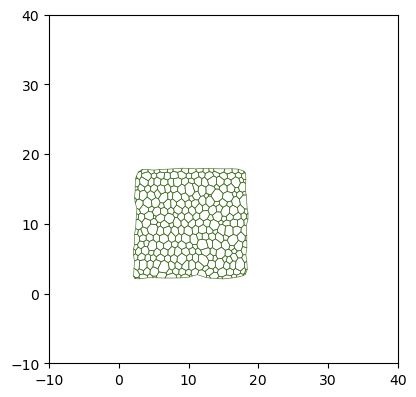

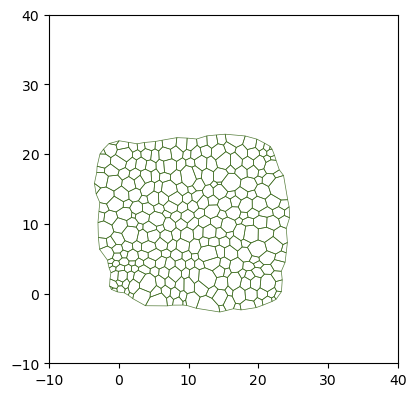

In [7]:
fig, ax = sheet_view(cellmap)
ax.set_xlim([-10, 40])  # Set the limits of the x-axis.
ax.set_ylim([-10, 40])
fig.set_size_inches((5, 5))


#cellmap.vert_df["viscosity"] = 500

#cellmap.face_df["area_elasticity"] = 7

#cellmap.edge_df["length_elasticity_FRC"] = cellmap.edge_df["length_elasticity_FRC"] * 0
#cellmap.edge_df["length_elasticity_ECM"] = cellmap.edge_df["length_elasticity_ECM"] / 1.5
#cellmap.edge_df["length_elasticity"] = cellmap.edge_df["length_elasticity_FRC"] + cellmap.edge_df["length_elasticity_ECM"]
cellmap.edge_df["length_elasticity"] = cellmap.edge_df["length_elasticity"]*0.7


cellmap.face_df["prefered_area"] = cellmap.face_df["prefered_area"] * 2
        
geom.update_all(cellmap)
    
energyContributions_model.compute_energy(cellmap)
[cellmap, geom, energyContributions_model, history_new, solver1] = vertexModel.solveEuler(cellmap, geom, energyContributions_model, 1000)

fig, ax = sheet_view(cellmap)
ax.set_xlim([-10, 40])  # Set the limits of the x-axis.
ax.set_ylim([-10, 40])
fig.set_size_inches((5, 5))

In [8]:
# Loop through the history and calculate mean area at each time step
mean_areas = []
mean_lengths = []

for t, cellmap_H in solver1.history:      
    mean_area = cellmap_H.face_df['area'].mean()
    mean_areas.append(mean_area)
        
for t, cellmap_H in solver1.history:
    mean_length = cellmap_H.edge_df['length'].mean()
    mean_lengths.append(mean_length)


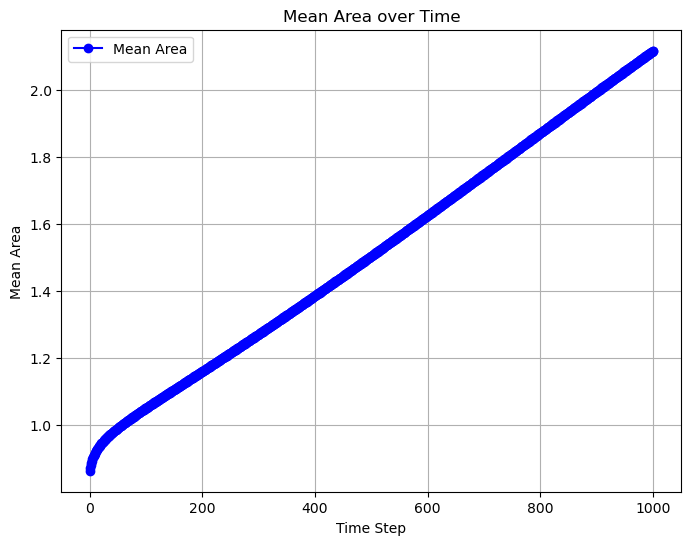

In [9]:
# Plot mean area over time (t)
plt.figure(figsize=(8, 6))
plt.plot(range(len(mean_areas)), mean_areas, marker='o', linestyle='-', color='blue', label='Mean Area')
plt.title('Mean Area over Time')
plt.xlabel('Time Step')
plt.ylabel('Mean Area')
plt.grid(True)
plt.legend()
plt.show()

In [10]:
def view_blue(cellmap, geom, highlight_edges=None):
    """
    Visualizes the cell map with options to show vertices and adjust vertex size.
    Includes edge highlighting for specified edges.
    
    Parameters:
    - cellmap: The cell map containing the geometry.
    - geom: Geometry object to update and use for visualization.
    - highlight_edges: List of edge indices to highlight (optional). Default is None.
    """
    # Update the geometry
    geom.update_all(cellmap)

    # Set default edge color (corresponding to blue in the 'bwr' colormap)
    default_color = -1  # Use -1 for blue in 'bwr' colormap

    # Reset all edge colors and widths
    cellmap.edge_df["color_edges"] = default_color  # Default blue color for non-highlighted edges
    cellmap.edge_df['edge_width'] = 1  # Default edge width

    # Create the plot with edge highlighting
    fig, ax = sheet_view(
        cellmap,
        mode="2D",
        face={"visible": False},
        edge={"head_width": 0.0, "color": 'blue', "colormap": "bwr", "width": cellmap.edge_df['edge_width'], "alpha": 1.0},  # Highlight edges if specified
        #vert={"visible": True, "s": 30, "color": "red", "alpha": 1.0}  # Keep vertices visible and red
        vert={"visible": False}
    )
    
    fig.set_size_inches(15, 15)
    ax.set_xlim([-10, 30])  # Set the limits of the x-axis.
    ax.set_ylim([-10, 30])
    return fig, ax


In [12]:
import os
import imageio
import matplotlib.pyplot as plt

def save_gif_and_frames(frame_list, output_gif_path, duration=0.5):
    """Helper function to save all frames as a GIF."""
    with imageio.get_writer(output_gif_path, mode='I', duration=duration) as writer:
        for frame_path in frame_list:
            image = imageio.imread(frame_path)
            writer.append_data(image)
    print(f"GIF created and saved as {output_gif_path}")

def save_frames_for_gif(solver_history, gif_folder, duration=0.5):
    # Ensure the folder for all PNG frames exists
    if not os.path.exists(gif_folder):
        try:
            os.makedirs(gif_folder)
            print(f"Directory created: {gif_folder}")
        except Exception as e:
            print(f"Error creating directory {gif_folder}: {e}")
            return
    
    # List to hold all frame file paths
    frame_list = []
    frame_count = 0  # To keep track of frame numbering

    # Loop through the history and save frames
    for t, cellmap_H in solver_history:
        fig, ax = view_blue(cellmap_H, geom)  # Call the view_blue function for each time step
        frame_filename = os.path.join(gif_folder, f"frame_{frame_count:03d}.png")
        fig.savefig(frame_filename)  # Save the current frame
        
        plt.close(fig)  # Close the figure to avoid too many open figures
        frame_list.append(frame_filename)  # Add to the list of frames
        frame_count += 1  # Increment frame count

    # Create a GIF from the saved frames
    combined_gif_path = os.path.join(gif_folder, 'output_animation.gif')
    save_gif_and_frames(frame_list, combined_gif_path, duration=duration)

# Example usage
#gif_folder = 'expansion_simulation_try1_10_initialisation'  # Specify your desired folder to save frames
#save_frames_for_gif(solver1.history, gif_folder)


GIF created and saved as expansion_simulation_try1_10_initialisation/output_animation.gif


In [13]:
import pickle
import gzip
import os

def save_state(obj, filename):
    """
    Save state of the different attributes of obj in filename.
    :param obj: The object to save (cellmap in your case)
    :param filename: The file to save the state to
    :return: None
    """
    with gzip.open(filename, 'wb') as f:
        pickle.dump(obj, f)  # Pickle the entire object

    print(f"State saved to {filename}")

In [14]:
def load_state(filename):
    """
    Load the state of the object from a saved file.
    :param filename: The file from which to load the state
    :return: The loaded object
    """
    with gzip.open(filename, 'rb') as f:
        obj = pickle.load(f)  # Load the entire object from the file

    print(f"State loaded from {filename}")
    return obj

In [15]:
# Save the state of your cellmap
save_folder = 'end_of_1000_expansion'  # Specify the folder to save the file
if not os.path.exists(save_folder):
    os.makedirs(save_folder)  # Ensure the folder exists

filename = os.path.join(save_folder, 'cellmap_state.pkl.gz')
save_state(cellmap, filename)

# Load the state back
loaded_cellmap = load_state(filename)
print(f"Loaded cellmap: {loaded_cellmap}")

State saved to end_of_1000_expansion/cellmap_state.pkl.gz
State loaded from end_of_1000_expansion/cellmap_state.pkl.gz
Loaded cellmap: <tyssue.core.sheet.Sheet object at 0x799cbaa6ad10>


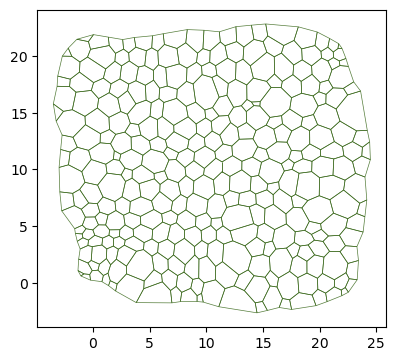

In [16]:
fig, ax = sheet_view(loaded_cellmap)
fig.set_size_inches((5, 5))

In [ ]:
#cellmap.edge_df["length_elasticity"] = cellmap.edge_df["length_elasticity"]*2        
#geom.update_all(cellmap)

In [17]:
import random

def find_vertices_with_top_edge_sums(cellmap, percentage):
    """
    Find the vertices with the largest sum of connected edge lengths and return the top `n%`.
    
    :param cellmap: The cellmap object
    :param percentage: The percentage of vertices to consider (1%/5%/10%)
    :return: List of vertices to divide
    """
    # Step 1: Calculate the edge sum for each vertex
    vertex_edge_sums = {}
    
    for vertex_id in cellmap.vert_df.index:
        # Find edges connected to this vertex
        connected_edges = cellmap.edge_df[(cellmap.edge_df['srce'] == vertex_id) | 
                                          (cellmap.edge_df['trgt'] == vertex_id)]
        # Sum the lengths of the edges connected to the vertex
        edge_sum = connected_edges['length'].sum()
        vertex_edge_sums[vertex_id] = edge_sum
    
    # Step 2: Sort vertices by edge sum in descending order
    sorted_vertices = sorted(vertex_edge_sums.items(), key=lambda x: x[1], reverse=True)
    
    # Step 3: Select top `n%` vertices
    total_vertices = len(sorted_vertices)
    num_vertices_to_select = int(total_vertices * (percentage / 100))
    
    # Get the top `n%` vertices
    top_vertices = [vertex[0] for vertex in sorted_vertices[:num_vertices_to_select]]
    
    return top_vertices


In [18]:
def divide_selected_vertices(cellmap, percentage, geom, energyContributions_model, gif_folder, distance=0.1):
    """
    Divide the top vertices based on the largest edge sum.
    
    :param cellmap: The cellmap to modify.
    :param top_vertices: List of vertices to divide based on edge sum.
    :param geom: Geometry object to update and use for visualization.
    :param energyContributions_model: The energy model to compute energy after modification.
    :param gif_folder: Folder to save frames for GIF.
    :param distance: The distance to divide the vertex (optional).
    :return: Updated cellmap after division.
    """
    # Ensure the folder for all PNG frames exists
    if not os.path.exists(gif_folder):
        try:
            os.makedirs(gif_folder)
            print(f"Directory created: {gif_folder}")
        except Exception as e:
            print(f"Error creating directory {gif_folder}: {e}")
            return

    
    top_vertices = find_vertices_with_top_edge_sums(cellmap, percentage)

    
    # List to hold all frame file paths
    frame_list = []
    frame_count = 0  # To keep track of frame numbering

    # Loop through the selected vertices and divide them
    for division_count, chosen_vertex in enumerate(top_vertices, start=1):
        print(f"Dividing vertex: {chosen_vertex}")

        # Divide the chosen vertex
        cellmap, new_vert_index, new_edge_index, opposite_edge_index, right_edges, left_edges = cellDivision.divide_vertex(
            cellmap, chosen_vertex, geom, energyContributions_model, distance)
        
        # Reset indices and geometry after division
        cellmap.reset_index()
        geom.update_all(cellmap)
        energyContributions_model.compute_energy(cellmap)

        # Solve for Euler's equation with updated energy contributions
        [cellmap, geom, model_H, history_H, solver] = vertexModel.solveEuler(cellmap, geom, energyContributions_model, endTime=40)

        # Save frames after each division step
        for t, cellmap_during_step in solver.history:
            # Save each frame with division count in the filename
            frame_filename = os.path.join(gif_folder, f"division_{division_count}_frame_{frame_count:03d}.png")
            fig, ax = view_blue(cellmap_during_step, geom)  # Visualize cellmap at current step
            fig.savefig(frame_filename)  # Save the current frame
            plt.close(fig)  # Close the figure to avoid too many open figures
            frame_list.append(frame_filename)  # Add to the list of frames
            frame_count += 1  # Increment frame count

    # Create a GIF from the saved frames
    combined_gif_path = os.path.join(gif_folder, 'output_division_animation.gif')
    save_gif_and_frames(frame_list, combined_gif_path)

    return cellmap

In [19]:
divide_selected_vertices(cellmap, 1, geom, energyContributions_model, 'Divisions_after_expansion', distance=0.1)


Dividing vertex: 520
Connected edges before reassignment: [1401, 1402, 1403, 1404, 1411, 1412]
All edges assigned to right vertex 580: [1401, 1402, 1403, 1404, 1672, 1673]
All edges assigned to left vertex 520: [1411, 1412, 1672, 1673]
Topology changed!
Dividing vertex: 566
Connected edges before reassignment: [1575, 1576, 1577, 1578, 1593, 1594]
All edges assigned to right vertex 566: [1577, 1578, 1674, 1675]
All edges assigned to left vertex 581: [1575, 1576, 1593, 1594, 1674, 1675]
Topology changed!
Dividing vertex: 47
Connected edges before reassignment: [753, 754, 755, 756, 1376, 1377]
All edges assigned to right vertex 47: [755, 756, 1376, 1377, 1676, 1677]
All edges assigned to left vertex 582: [753, 754, 1676, 1677]
Topology changed!
Dividing vertex: 339
Connected edges before reassignment: [737, 738, 739, 752]
All edges assigned to right vertex 583: [737, 738, 739, 1678, 1679]
All edges assigned to left vertex 339: [752, 1678, 1679]
Topology changed!
Dividing vertex: 175
Conne